## Housing Affordability in Austin, Texas
Our analysis will go here

## Data Import and Cleanup
- Import dependencies
- Load data into dataframes
- Grab columns we want for analysis

In [1]:
# import data and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# read in data into dataframes 
employment_by_industry = pd.read_csv("data/employment_by_industries.csv")
property_value = pd.read_csv("data/property_value.csv")
demographics = pd.read_csv("data/tdc_download_tool.csv")
wage_by_gender = pd.read_csv("data/wage_by_gender_in_common_jobs.csv")
wage_by_race = pd.read_csv("data/wage_by_race_and_ethnicity_in_common_jobs.csv")
austin_income = pd.read_csv("data/austin_median_household_income.csv")


In [3]:
# grab columns we want about propery data 
property_value = property_value[['ID Value Bucket',
                'Value Bucket',
               'Year',
               'Property Value by Bucket',
               'Property Value by Bucket Moe',
               'Geography',
               'share']]
property_value.head()

,ID Value Bucket,Value Bucket,Year,Property Value by Bucket,Property Value by Bucket Moe,Geography,share
0,0,"Less Than $10,000",2017,1000376,16112.0,United States,0.013045
1,25,"$2,000,000 or More",2017,2224,832.0,"Austin, TX",0.013137
2,2,"$15,000 to $19,999",2017,484108,10315.0,United States,0.006313
3,3,"$20,000 to $24,999",2017,537939,9802.0,United States,0.007015
4,4,"$25,000 to $29,999",2017,495363,10768.0,United States,0.006460


In [4]:
# grab columns we want about wage data 
wage_by_gender = wage_by_gender[["Gender",
                "Year",
               "Detailed Occupation",
               "Average Wage",
               "Average Wage Appx MOE",
               "Total Population",
               "Total Population MOE Appx",
                "Geography"]]

wage_by_race = wage_by_race[["Race",
             "Year",
             "Detailed Occupation",
             "Average Wage",
             "Average Wage Appx MOE",
             "Total Population",
             "Total Population MOE Appx",
             "Geography"]]

wage_by_race.head()

,Race,Year,Detailed Occupation,Average Wage,Average Wage Appx MOE,Total Population,Total Population MOE Appx,Geography
0,Black,2017,Miscellaneous managers,69171.764829,6422.316804,30548,4285.814751,Texas
1,Two or More Races,2017,Retail salespersons,21091.920452,8820.370169,8146,2215.159608,Texas
2,Two or More Races,2017,Driver/sales workers & truck drivers,39007.477377,9268.471191,4133,1578.103411,Texas
3,Two or More Races,2017,Miscellaneous managers,86430.587985,22866.284236,7524,2128.962714,Texas
4,Two or More Races,2017,Elementary & middle school teachers,45618.450450,5322.337122,6882,2036.161331,Texas


In [5]:
# grab columns we want about industry data
employment_by_industry = employment_by_industry[['Industry', 
                        'Year', 
                        'Workforce by Industry and Gender', 
                        'Workforce by Industry and Gender Moe']]
employment_by_industry.head()

,Industry,Year,Workforce by Industry and Gender,Workforce by Industry and Gender Moe
0,Educational Services,2017,58591,4083.898750
1,Public Administration,2017,29054,2868.084378
2,"Other Services, Except Public Administration",2017,26993,3119.346246
3,"Mining, Quarrying, & Oil & Gas Extraction",2017,2802,875.727126
4,Accommodation & Food Services,2017,48958,3997.982741


In [6]:
#clean up demographics data 
demographics["White Male"] = demographics["White Male"].str.replace(',','')
demographics["White Male"] = demographics["White Male"].astype(int)
demographics["White Female"] = demographics["White Female"].str.replace(',','')
demographics["White Female"] = demographics["White Female"].astype(int)
demographics["Black Male"] = demographics["Black Male"].str.replace(',','')
demographics["Black Male"] = demographics["Black Male"].astype(int)
demographics["Black Female"] = demographics["Black Female"].str.replace(',','')
demographics["Black Female"] = demographics["Black Female"].astype(int)
demographics["Hispanic Male"] = demographics["Hispanic Male"].str.replace(',','')
demographics["Hispanic Male"] = demographics["Hispanic Male"].astype(int)
demographics["Hispanic Female"] = demographics["Hispanic Female"].str.replace(',','')
demographics["Hispanic Female"] = demographics["Hispanic Female"].astype(int)


demographics = demographics[["Year",
             "Age",
             "White Male",
             "White Female",
             "Black Male",
             "Black Female",
             "Hispanic Male",
             "Hispanic Female"]]
demographics.head()

,Year,Age,White Male,White Female,Black Male,Black Female,Hispanic Male,Hispanic Female
0,2017,< 05,15336,14590,3231,3159,19631,18786
1,2017,05-09,14209,13366,3066,2965,19100,18416
2,2017,10-14,13381,12563,3158,3087,18115,17388
3,2017,15-19,13211,12983,3576,3263,17636,16457
4,2017,20-24,17553,17309,3970,3921,17325,17012


## Austin Basics (Ashley)
- Propery values over time 
- Population changes over time 
- Wage distribution over time

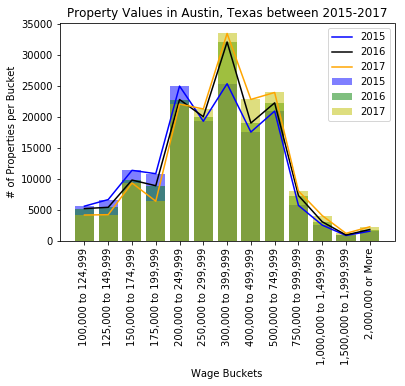

In [53]:
# get necessary data from table for chart
atx_property = property_value.loc[property_value["Geography"] == "Austin, TX"]
atx_property = atx_property.loc[atx_property["ID Value Bucket"] >= 13]
atx_property = atx_property.sort_values("ID Value Bucket")
year1 = atx_property.loc[atx_property["Year"] == 2015]
year2 = atx_property.loc[atx_property["Year"] == 2016]
year3 = atx_property.loc[atx_property["Year"] == 2017]

#identify x/y values and error for chart
x1 = year1["ID Value Bucket"]
y1 = year1["Property Value by Bucket"]
x2 = year2["ID Value Bucket"]
y2 = year2["Property Value by Bucket"]
x3 = year3["ID Value Bucket"]
y3 = year3["Property Value by Bucket"]

# graph values on a bar chart 
fig, ax = plt.subplots()
ax.bar(x1,y1,alpha=0.5, label="2015", color='b')
ax.bar(x2,y2, alpha=0.5, label="2016", color='g')
ax.bar(x3,y3,alpha=0.5,label ="2017",color='y')

# add labels and title 
ax.set_xlabel("Wage Buckets")
ax.set_ylabel("# of Properties per Bucket")
ax.set_title("Property Values in Austin, Texas between 2015-2017")
plt.xticks(x1, rotation = 'vertical')
ax.set_xticklabels(('100,000 to 124,999',
                    '125,000 to 149,999',
                    '150,000 to 174,999',
                    '175,000 to 199,999',
                    '200,000 to 249,999',
                    '250,000 to 299,999',
                    '300,000 to 399,999',
                    '400,000 to 499,999',
                    '500,000 to 749,999',
                    '750,000 to 999,999',
                    '1,000,000 to 1,499,999',
                    '1,500,000 to 1,999,999',
                    '2,000,000 or More'))
ax.legend()

plt.plot(x1,y1, label="2015", c='b')
plt.plot(x2,y2, label = "2016",c='black')
plt.plot(x3,y3,label="2017",c='orange')
plt.legend()
plt.savefig('images/property_values.png',bbox_inches="tight")

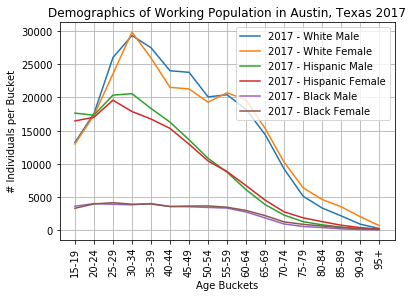

In [9]:
# select only ages that can work in the city 
atx_demo = demographics.sort_values("Age")
working_pop = atx_demo.loc[(atx_demo["Age"] != "< 05") & 
                           (atx_demo["Age"] != "05-09") & 
                           (atx_demo["Age"] != "10-14")]

# get values for demographics chart
year1_demo = working_pop.loc[working_pop["Year"] == 2017]
x_year1 = year1_demo["Age"]
white1 = year1_demo[["White Male"]]
white2 = year1_demo[["White Female"]]
black1 = year1_demo[["Black Male"]]
black2 = year1_demo[["Black Female"]]
his1 = year1_demo[["Hispanic Male"]]
his2 = year1_demo[["Hispanic Female"]]

# create chart on population changes over time 
plt.plot(x_year1,white1,label="2017 - White Male")
plt.plot(x_year1,white2, label="2017 - White Female")
plt.plot(x_year1,his1, label = "2017 - Hispanic Male")
plt.plot(x_year1,his2, label = "2017 - Hispanic Female")
plt.plot(x_year1,black1, label = "2017 - Black Male")
plt.plot(x_year1,black2, label = "2017 - Black Female")

# set labels and legend 
plt.xlabel("Age Buckets")
plt.ylabel("# Individuals per Bucket")
plt.title("Demographics of Working Population in Austin, Texas 2017")
plt.xticks(x_year1, rotation = 'vertical')
plt.legend()
plt.grid()
plt.savefig('images/working_demographics_2017.png',bbox_inches = 'tight')

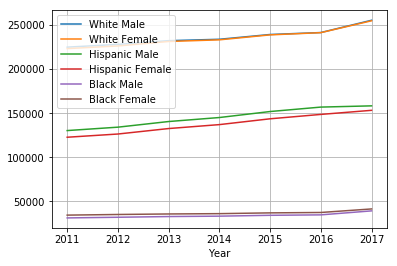

In [148]:
age_grouped = working_pop.groupby(["Age"])
year_grouped = working_pop.groupby(["Year"])
year_total = year_grouped[["White Male","White Female","Hispanic Male",
                         "Hispanic Female", "Black Male",
                         "Black Female"]].sum()
year_total.plot(grid=True)

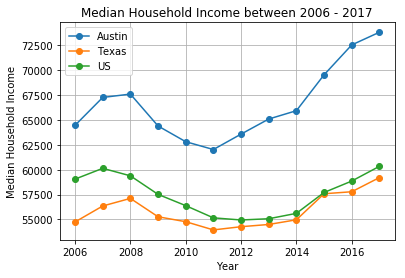

In [10]:
# charts on wage distribution over time 

# identify x and y for different income values
x_income = austin_income["Date"]
y_income = austin_income["Austin"]
texas_income = austin_income["Texas"]
us_income = austin_income["US"]

# plot values and set x/y axis and title
plt.plot(x_income,y_income, marker='o',label="Austin")
plt.plot(x_income,texas_income,marker='o',label="Texas")
plt.plot(x_income,us_income,marker='o',label="US")
plt.xlabel("Year")
plt.ylabel("Median Household Income")
plt.title("Median Household Income between 2006 - 2017")
plt.legend()
plt.grid()
plt.savefig('images/household_income.png',bbox_inches="tight")

In [113]:
# calculate basic information about 2015 for summary table 
max_2015 = year1["Property Value by Bucket"].max()
prop_2015 = year1.loc[year1["Property Value by Bucket"] == max_2015]
prop_2015 = prop_2015.iloc[0]["Value Bucket"]
demo_2015 = working_pop.loc[working_pop["Year"] == 2015]
demo_sum2015 = (demo_2015[["White Male","Black Male","Hispanic Male", "White Female",
                        "Black Female","Hispanic Female"]].sum()).sum()
income_2015 = (austin_income.loc[(austin_income["Date"] == 2015)])["Austin"]
income_2015 = income_2015.iloc[0]

max_2016 = year2["Property Value by Bucket"].max()
prop_2016 = year2.loc[year2["Property Value by Bucket"] == max_2016]
prop_2016 = prop_2016.iloc[0]["Value Bucket"]
demo_2016 = working_pop.loc[working_pop["Year"] == 2016]
demo_sum2016 = (demo_2016[["White Male","Black Male","Hispanic Male", "White Female",
                        "Black Female","Hispanic Female"]].sum()).sum()
income_2016 = (austin_income.loc[(austin_income["Date"] == 2016)])["Austin"]
income_2016 = income_2016.iloc[0]

max_2017 = year3["Property Value by Bucket"].max()
prop_2017 = year3.loc[year3["Property Value by Bucket"] == max_2017]
prop_2017 = prop_2017.iloc[0]["Value Bucket"]
demo_2017 = working_pop.loc[working_pop["Year"] == 2017]
demo_sum2017 = (demo_2017[["White Male","Black Male","Hispanic Male", "White Female",
                        "Black Female","Hispanic Female"]].sum()).sum()
income_2017 = (austin_income.loc[(austin_income["Date"] == 2017)])["Austin"]
income_2017 = income_2017.iloc[0]


# create a summary dataframe to show changes in data above 
summary = pd.DataFrame({
    "Max Property Value":{"2015":prop_2015,
                          "2016":prop_2016,
                          "2017":prop_2017},
    "# Of Properties in Bucket":{"2015":max_2015,
                                "2016":max_2016,
                                "2017":max_2017},
    "% Change in # of Properties":{"2015":"n/a",
                                  "2016":round((((max_2016-max_2015))/max_2015)*100,2),
                                  "2017":round((((max_2017-max_2016))/max_2016)*100,2)},
    "Total Population of Austin":{"2015":demo_sum2015,
                                 "2016":demo_sum2016,
                                 "2017":demo_sum2017},
    "% Change in Total Population":{"2015":"n/a",
                                   "2016":round((((demo_sum2016 - demo_sum2015))/demo_sum2015)*100,2),
                                   "2017":round((((demo_sum2017 - demo_sum2016))/demo_sum2016)*100,2)},
    "Median Household Income in Austin":{"2015":income_2015,
                                        "2016":income_2016,
                                        "2017":income_2017},
    "% Change in Median Household Income":{"2015":"n/a",
                                          "2016":round((((income_2016 - income_2015))/income_2015)*100,2),
                                          "2017":round((((income_2017 - income_2016))/income_2016)*100,2)}
})
summary

,Max Property Value,# Of Properties in Bucket,% Change in # of Properties,Total Population of Austin,% Change in Total Population,Median Household Income in Austin,% Change in Median Household Income
2015,"$300,000 to $399,999",25327,n/a,845088,n/a,69525.0,n/a
2016,"$300,000 to $399,999",32072,26.63,860755,1.85,72527.0,4.32
2017,"$300,000 to $399,999",33446,4.28,902684,4.87,73800.0,1.76


## Austin Income Differences (Valeria & Vincent)
- Wage vs gender over time 
- Wage vs race over time 

In [ ]:
# charts on wage vs gender over time 
# what is the gender/occupation that can afford to live in austin each year?
# what is the gender/occupation that cannot afford to live in austin each year? 

In [ ]:
# charts on wage vs race over time 
# what is the race/occupation that can afford to live in austin each year?
# what is the race/occupation that cannot afford to live in austin each year?

## Austin Industry Information (Mark)
- Changes in industry over time 

In [ ]:
# charts on industry changes over time 
# what trends do we see in industry?
# which genders/races typically work in the top industry? can they afford to live in austin each year?
# which genders/races typically work in the bottom industry? can they afford to live in austin each year? 